# Point Addition and Removal

We perform point addition and removal experiments which are commonly used in evaluation of data valuation techniques. Particularly, we measure the **expected** model performance after data deletion to adapt to our problem setting. A sample run is given below:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from statistics import mean, stdev
from derdava.coalition_probability import IndependentCoalitionProbability
from derdava.data_source import generate_random_data_sources, add_classification_noise
from derdava.data_valuation import ValuableModel
from derdava.dataset import load_dataset
from derdava.model_utility import IClassificationModel, model_logistic_regression

# Add logs
import logging
import sys
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(lineno)s - %(levelname)s - %(message)s')
logger.setLevel(logging.DEBUG)

fhandler = logging.FileHandler(filename='main4.log', mode='w')
fhandler.setFormatter(formatter)
fhandler.setLevel(logging.INFO)
logger.addHandler(fhandler)

consoleHandler = logging.StreamHandler(sys.stdout)
consoleHandler.setFormatter(formatter)
consoleHandler.setLevel(logging.DEBUG)
logger.addHandler(consoleHandler)

logger.info("Program has started.")

X, y = load_dataset('phoneme')
one_indices = np.random.choice(np.asarray(y == 1).nonzero()[0], size=int(len(y[y == 2]) * 1.5), replace=False)
two_indices = np.asarray(y == 2).nonzero()[0]
indices = np.concatenate([one_indices, two_indices])
X = X[indices]
y = y[indices]
y = add_classification_noise(y, noise_level=0.1)
X, y = shuffle(X, y)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

NUM_OF_DATA_SOURCES = 100
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:0.5 for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)
model = model_logistic_regression

random_orders = []
loo_orders = []
shapley_orders = []
derdava_shapley_orders = []

for N in range(50):
    logger.info(f"====> Iteration {N} =====")
    indices = np.random.choice(len(X), size=NUM_OF_DATA_SOURCES, replace=False)
    X_train = X[indices]
    y_train = y[indices]
    data_sources = {i: (X_train[i:i+1], y_train[i:i+1]) for i in range(NUM_OF_DATA_SOURCES)}
    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    random_order = np.arange(NUM_OF_DATA_SOURCES)
    np.random.shuffle(random_order)
    random_orders.append(indices[random_order])
    
    logger.info("---------> Random done.")
    
    loo_values = valuable_model.valuate(data_valuation_function='loo')
    loo_order = sorted(support_set, key=lambda x: loo_values[x], reverse=True)
    loo_orders.append(indices[loo_order])
    
    logger.info("---------> LOO done.")
    
    shapley_values = valuable_model.valuate(data_valuation_function='monte-carlo shapley',
                                            tolerance=1.005)
    shapley_order = sorted(support_set, key=lambda x: shapley_values[x], reverse=True)
    shapley_orders.append(indices[shapley_order])
    
    logger.info("---------> Shapley done.")
    
    derdava_shapley_values = valuable_model.valuate(data_valuation_function='012-mcmc robust shapley',
                                                    coalition_probability=coalition_probability,
                                                    tolerance=1.005)
    derdava_shapley_order = sorted(support_set, key=lambda x: derdava_shapley_values[x], reverse=True)
    derdava_shapley_orders.append(indices[derdava_shapley_order])
    
    logger.info("---------> DeRDaVa done.")
    
logger.info("Random orders: " + str(random_orders))
logger.info("LOO orders: " + str(loo_orders))
logger.info("Shapley orders: " + str(shapley_orders))
logger.info("DeRDaVa Shapley orders: " + str(derdava_shapley_orders))

2023-05-16 14:03:43,602 - 29 - INFO - Program has started.
2023-05-16 14:03:43,602 - 29 - INFO - Program has started.
2023-05-16 14:03:43,602 - 29 - INFO - Program has started.
2023-05-16 14:03:43,602 - 29 - INFO - Program has started.
2023-05-16 14:03:43,602 - 29 - INFO - Program has started.
2023-05-16 14:03:43,625 - 53 - INFO - ====> Iteration 0 =====
2023-05-16 14:03:43,625 - 53 - INFO - ====> Iteration 0 =====
2023-05-16 14:03:43,625 - 53 - INFO - ====> Iteration 0 =====
2023-05-16 14:03:43,625 - 53 - INFO - ====> Iteration 0 =====
2023-05-16 14:03:43,625 - 53 - INFO - ====> Iteration 0 =====
2023-05-16 14:03:43,747 - 64 - INFO - ---------> Random done.
2023-05-16 14:03:43,747 - 64 - INFO - ---------> Random done.
2023-05-16 14:03:43,747 - 64 - INFO - ---------> Random done.
2023-05-16 14:03:43,747 - 64 - INFO - ---------> Random done.
2023-05-16 14:03:43,747 - 64 - INFO - ---------> Random done.
2023-05-16 14:03:43,965 - 70 - INFO - ---------> LOO done.
2023-05-16 14:03:43,965 - 

====> Monte-Carlo Round 1000 - Average convergence rate = 0.9997891518852
---------> Number of values that have not converged: 2
2023-05-16 14:46:19,052 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 14:46:19,052 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 14:46:19,052 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 14:46:19,052 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 14:46:19,052 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 14:46:19,057 - 53 - INFO - ====> Iteration 3 =====
2023-05-16 14:46:19,057 - 53 - INFO - ====> Iteration 3 =====
2023-05-16 14:46:19,057 - 53 - INFO - ====> Iteration 3 =====
2023-05-16 14:46:19,057 - 53 - INFO - ====> Iteration 3 =====
2023-05-16 14:46:19,057 - 53 - INFO - ====> Iteration 3 =====
2023-05-16 14:46:19,147 - 64 - INFO - ---------> Random done.
2023-05-16 14:46:19,147 - 64 - INFO - ---------> Random done.
2023-05-16 14:46:19,147 - 64 - INFO - ---------> Random done.
2023-05-16 14:46:19,147 - 64 - INFO - ---------> Random done

2023-05-16 15:19:27,378 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 15:19:27,383 - 53 - INFO - ====> Iteration 6 =====
2023-05-16 15:19:27,383 - 53 - INFO - ====> Iteration 6 =====
2023-05-16 15:19:27,383 - 53 - INFO - ====> Iteration 6 =====
2023-05-16 15:19:27,383 - 53 - INFO - ====> Iteration 6 =====
2023-05-16 15:19:27,383 - 53 - INFO - ====> Iteration 6 =====
2023-05-16 15:19:27,468 - 64 - INFO - ---------> Random done.
2023-05-16 15:19:27,468 - 64 - INFO - ---------> Random done.
2023-05-16 15:19:27,468 - 64 - INFO - ---------> Random done.
2023-05-16 15:19:27,468 - 64 - INFO - ---------> Random done.
2023-05-16 15:19:27,468 - 64 - INFO - ---------> Random done.
2023-05-16 15:19:27,677 - 70 - INFO - ---------> LOO done.
2023-05-16 15:19:27,677 - 70 - INFO - ---------> LOO done.
2023-05-16 15:19:27,677 - 70 - INFO - ---------> LOO done.
2023-05-16 15:19:27,677 - 70 - INFO - ---------> LOO done.
2023-05-16 15:19:27,677 - 70 - INFO - ---------> LOO done.
====> Monte-Carlo Roun

2023-05-16 16:02:10,095 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:02:10,095 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:02:10,095 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:02:10,095 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:02:10,095 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:02:10,100 - 53 - INFO - ====> Iteration 9 =====
2023-05-16 16:02:10,100 - 53 - INFO - ====> Iteration 9 =====
2023-05-16 16:02:10,100 - 53 - INFO - ====> Iteration 9 =====
2023-05-16 16:02:10,100 - 53 - INFO - ====> Iteration 9 =====
2023-05-16 16:02:10,100 - 53 - INFO - ====> Iteration 9 =====
2023-05-16 16:02:10,207 - 64 - INFO - ---------> Random done.
2023-05-16 16:02:10,207 - 64 - INFO - ---------> Random done.
2023-05-16 16:02:10,207 - 64 - INFO - ---------> Random done.
2023-05-16 16:02:10,207 - 64 - INFO - ---------> Random done.
2023-05-16 16:02:10,207 - 64 - INFO - ---------> Random done.
2023-05-16 16:02:10,405 - 70 - INFO - ---------> LOO done.
2023-0

====> Monte-Carlo Round 1500 - Average convergence rate = 1.000168284194373
---------> Number of values that have not converged: 4
2023-05-16 16:39:29,433 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:39:29,433 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:39:29,433 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:39:29,433 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:39:29,433 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 16:39:29,438 - 53 - INFO - ====> Iteration 12 =====
2023-05-16 16:39:29,438 - 53 - INFO - ====> Iteration 12 =====
2023-05-16 16:39:29,438 - 53 - INFO - ====> Iteration 12 =====
2023-05-16 16:39:29,438 - 53 - INFO - ====> Iteration 12 =====
2023-05-16 16:39:29,438 - 53 - INFO - ====> Iteration 12 =====
2023-05-16 16:39:29,531 - 64 - INFO - ---------> Random done.
2023-05-16 16:39:29,531 - 64 - INFO - ---------> Random done.
2023-05-16 16:39:29,531 - 64 - INFO - ---------> Random done.
2023-05-16 16:39:29,531 - 64 - INFO - ---------> Rand

====> Monte-Carlo Round 2500 - Average convergence rate = 1.0004889410449942
---------> Number of values that have not converged: 1
2023-05-16 17:20:43,053 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 17:20:43,053 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 17:20:43,053 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 17:20:43,053 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 17:20:43,053 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 17:20:43,057 - 53 - INFO - ====> Iteration 15 =====
2023-05-16 17:20:43,057 - 53 - INFO - ====> Iteration 15 =====
2023-05-16 17:20:43,057 - 53 - INFO - ====> Iteration 15 =====
2023-05-16 17:20:43,057 - 53 - INFO - ====> Iteration 15 =====
2023-05-16 17:20:43,057 - 53 - INFO - ====> Iteration 15 =====
2023-05-16 17:20:43,176 - 64 - INFO - ---------> Random done.
2023-05-16 17:20:43,176 - 64 - INFO - ---------> Random done.
2023-05-16 17:20:43,176 - 64 - INFO - ---------> Random done.
2023-05-16 17:20:43,176 - 64 - INFO - ---------> Ran

2023-05-16 18:01:03,087 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 18:01:03,087 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 18:01:03,087 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 18:01:03,087 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 18:01:03,087 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 18:01:03,091 - 53 - INFO - ====> Iteration 18 =====
2023-05-16 18:01:03,091 - 53 - INFO - ====> Iteration 18 =====
2023-05-16 18:01:03,091 - 53 - INFO - ====> Iteration 18 =====
2023-05-16 18:01:03,091 - 53 - INFO - ====> Iteration 18 =====
2023-05-16 18:01:03,091 - 53 - INFO - ====> Iteration 18 =====
2023-05-16 18:01:03,187 - 64 - INFO - ---------> Random done.
2023-05-16 18:01:03,187 - 64 - INFO - ---------> Random done.
2023-05-16 18:01:03,187 - 64 - INFO - ---------> Random done.
2023-05-16 18:01:03,187 - 64 - INFO - ---------> Random done.
2023-05-16 18:01:03,187 - 64 - INFO - ---------> Random done.
2023-05-16 18:01:03,385 - 70 - INFO - ---------> LOO done.
2

2023-05-16 18:36:56,731 - 85 - INFO - ---------> DeRDaVa done.
2023-05-16 18:36:56,734 - 53 - INFO - ====> Iteration 21 =====
2023-05-16 18:36:56,734 - 53 - INFO - ====> Iteration 21 =====
2023-05-16 18:36:56,734 - 53 - INFO - ====> Iteration 21 =====
2023-05-16 18:36:56,734 - 53 - INFO - ====> Iteration 21 =====
2023-05-16 18:36:56,734 - 53 - INFO - ====> Iteration 21 =====
2023-05-16 18:36:56,803 - 64 - INFO - ---------> Random done.
2023-05-16 18:36:56,803 - 64 - INFO - ---------> Random done.
2023-05-16 18:36:56,803 - 64 - INFO - ---------> Random done.
2023-05-16 18:36:56,803 - 64 - INFO - ---------> Random done.
2023-05-16 18:36:56,803 - 64 - INFO - ---------> Random done.
2023-05-16 18:36:56,999 - 70 - INFO - ---------> LOO done.
2023-05-16 18:36:56,999 - 70 - INFO - ---------> LOO done.
2023-05-16 18:36:56,999 - 70 - INFO - ---------> LOO done.
2023-05-16 18:36:56,999 - 70 - INFO - ---------> LOO done.
2023-05-16 18:36:56,999 - 70 - INFO - ---------> LOO done.
====> Monte-Carlo

In [83]:
print(X.shape, y.shape, X_test.shape, y_test.shape)

(3172, 5) (3172,) (793, 5) (793,)


In [84]:
from sklearn.dummy import DummyClassifier

def get_point_addition_performances(model, X_train, y_train, X_test, y_test, order):
    performances = []
    for i in range(1, len(order) + 1):
        if i % 50 == 0: print(i)
        X_train_curr = X_train[order[0:i]]
        y_train_curr = y_train[order[0:i]]
        
        performance = 0
        
        for N in range(50):
            indices = np.asarray(np.random.randint(0, 2, i) == 1).nonzero()[0]
            #print(indices)
            X_train_temp = X_train_curr[indices]
            y_train_temp = y_train_curr[indices]
            
            if not len(y_train_temp):
                performance += 0.5
        
            elif np.all(y_train_temp == y_train_temp[0]):
                performance += DummyClassifier(strategy='constant', constant=y_train_temp[0]) \
                                  .fit(X_train_temp, y_train_temp) \
                                  .score(X_test, y_test)
            else:
                performance += model().fit(X_train_temp, y_train_temp).score(X_test, y_test)
            
        performance /= 50
        performances.append(performance)
    
    return performances  

In [85]:
from urdava.model_utility import model_logistic_regression
import numpy as np

random_performances = []
loo_performances = []
shapley_performances = []
derdava_shapley_performances = []

model = model_logistic_regression

for N in range(50):
    random_performance = get_point_addition_performances(model, X, y, X_test, y_test, random_orders[N])
    random_performances.append(random_performance)
    loo_performance = get_point_addition_performances(model, X, y, X_test, y_test, loo_orders[N])
    loo_performances.append(loo_performance)
    shapley_performance = get_point_addition_performances(model, X, y, X_test, y_test, shapley_orders[N])
    shapley_performances.append(shapley_performance)
    derdava_shapley_performance = get_point_addition_performances(model, X, y, X_test, y_test, derdava_shapley_orders[N])
    derdava_shapley_performances.append(derdava_shapley_performance)
    

====> Iteration 0 <====
50
100
50
100
50
100
50
100
====> Iteration 1 <====
50
100
50
100
50
100
50
100
====> Iteration 2 <====
50
100
50
100
50
100
50
100
====> Iteration 3 <====
50
100
50
100
50
100
50
100
====> Iteration 4 <====
50
100
50
100
50
100
50
100
====> Iteration 5 <====
50
100
50
100
50
100
50
100
====> Iteration 6 <====
50
100
50
100
50
100
50
100
====> Iteration 7 <====
50
100
50
100
50
100
50
100
====> Iteration 8 <====
50
100
50
100
50
100
50
100
====> Iteration 9 <====
50
100
50
100
50
100
50
100
====> Iteration 10 <====
50
100
50
100
50
100
50
100
====> Iteration 11 <====
50
100
50
100
50
100
50
100
====> Iteration 12 <====
50
100
50
100
50
100
50
100
====> Iteration 13 <====
50
100
50
100
50
100
50
100
====> Iteration 14 <====
50
100
50
100
50
100
50
100
====> Iteration 15 <====
50
100
50
100
50
100
50
100
====> Iteration 16 <====
50
100
50
100
50
100
50
100
====> Iteration 17 <====
50
100
50
100
50
100
50
100
====> Iteration 18 <====
50
100
50
100
50
100
50
100
===

In [86]:
from statistics import mean, stdev

NUM_OF_DATA_SOURCES = 100
support_set = tuple(range(NUM_OF_DATA_SOURCES))

random_performances = np.array(random_performances)
random_means = np.zeros(NUM_OF_DATA_SOURCES + 1)
random_stdevs = np.zeros(NUM_OF_DATA_SOURCES + 1)
loo_performances = np.array(loo_performances)
loo_means = np.zeros(NUM_OF_DATA_SOURCES + 1)
loo_stdevs = np.zeros(NUM_OF_DATA_SOURCES + 1)
shapley_performances = np.array(shapley_performances)
shapley_means = np.zeros(NUM_OF_DATA_SOURCES + 1)
shapley_stdevs = np.zeros(NUM_OF_DATA_SOURCES + 1)
derdava_shapley_performances = np.array(derdava_shapley_performances)
derdava_shapley_means = np.zeros(NUM_OF_DATA_SOURCES + 1)
derdava_shapley_stdevs = np.zeros(NUM_OF_DATA_SOURCES + 1)

for i in support_set:
    random_means[i + 1] = mean(random_performances[:, i])
    random_stdevs[i + 1] = stdev(random_performances[:, i])
    loo_means[i + 1] = mean(loo_performances[:, i])
    loo_stdevs[i + 1] = stdev(loo_performances[:, i])
    shapley_means[i + 1] = mean(shapley_performances[:, i])
    shapley_stdevs[i + 1] = stdev(shapley_performances[:, i])
    derdava_shapley_means[i + 1] = mean(derdava_shapley_performances[:, i])
    derdava_shapley_stdevs[i + 1] = stdev(derdava_shapley_performances[:, i])

In [87]:
random_means[0] = 0.50
loo_means[0] = 0.50
shapley_means[0] = 0.50
derdava_shapley_means[0] = 0.50

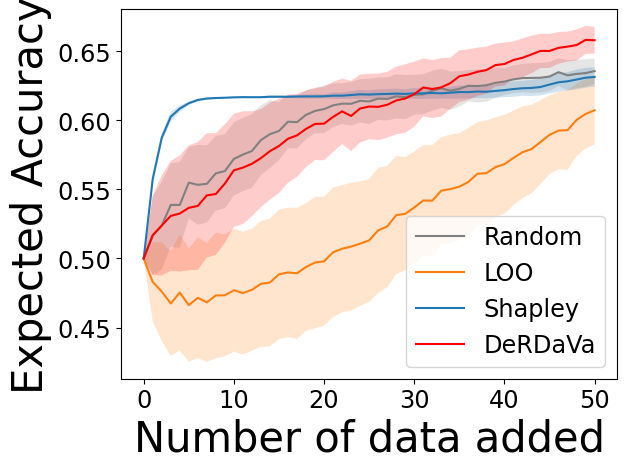

In [115]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots()
x = np.arange(51)

random_line, = ax.plot(x, random_means[0:51], color="gray")
random_line.set_label("Random")
ax.fill_between(x, (random_means-1/2 * random_stdevs)[0:51], (random_means+1/2 * random_stdevs)[0:51], facecolor="gray", alpha=0.2)

loo_line, = ax.plot(x, loo_means[0:51], color="C1")
loo_line.set_label("LOO")
ax.fill_between(x, (loo_means-1/2 * loo_stdevs)[0:51], (loo_means+1/2 * loo_stdevs)[0:51], facecolor="C1", alpha=0.2)

shapley_line, = ax.plot(x, shapley_means[0:51], color="C0")
shapley_line.set_label("Shapley")
ax.fill_between(x, (shapley_means-1/2 * shapley_stdevs)[0:51], (shapley_means+1/2 * shapley_stdevs)[0:51], facecolor="C0", alpha=0.2)

derdava_shapley_line, = ax.plot(x, derdava_shapley_means[0:51], color="red")
derdava_shapley_line.set_label("DeRDaVa")
ax.fill_between(x, (derdava_shapley_means-1/2 * derdava_shapley_stdevs)[0:51], (derdava_shapley_means+1/2 * derdava_shapley_stdevs)[0:51], facecolor="red", alpha=0.2)

ax.set_xlabel("Number of data added", fontsize=30)
ax.set_ylabel("Expected Accuracy", fontsize=30)
ax.tick_params(axis='both', labelsize='xx-large')

ax.legend(fontsize='xx-large')

plt.show()
PATH_TO_IMAGES = "./images/point_addition_removal/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "par_add_highest"), dpi=300, bbox_inches='tight')


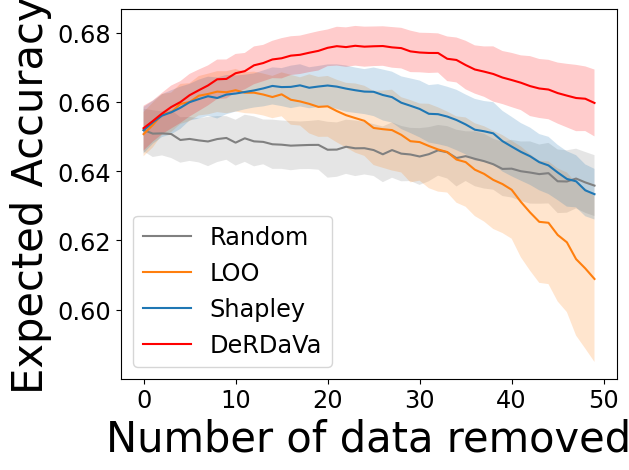

In [127]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.arange(51, 101)

random_line, = ax.plot(100-x, random_means[51:101], color="gray")
random_line.set_label("Random")
ax.fill_between(100-x, (random_means-1/2 * random_stdevs)[51:101], (random_means+1/2 * random_stdevs)[51:101], facecolor="gray", alpha=0.2)

loo_line, = ax.plot(100-x, loo_means[51:101], color="C1")
loo_line.set_label("LOO")
ax.fill_between(100-x, (loo_means-1/2 * loo_stdevs)[51:101], (loo_means+1/2 * loo_stdevs)[51:101], facecolor="C1", alpha=0.2)

shapley_line, = ax.plot(100-x, shapley_means[51:101], color="C0")
shapley_line.set_label("Shapley")
ax.fill_between(100-x, (shapley_means-1/2 * shapley_stdevs)[51:101], (shapley_means+1/2 * shapley_stdevs)[51:101], facecolor="C0", alpha=0.2)

derdava_shapley_line, = ax.plot(100-x, derdava_shapley_means[51:101], color="red")
derdava_shapley_line.set_label("DeRDaVa")
ax.fill_between(100-x, (derdava_shapley_means-1/2 * derdava_shapley_stdevs)[51:101], (derdava_shapley_means+1/2 * derdava_shapley_stdevs)[51:101], facecolor="red", alpha=0.2)

ax.set_xlabel("Number of data removed", fontsize=30)
ax.set_ylabel("Expected Accuracy", fontsize=30)
ax.tick_params(axis='both', labelsize='xx-large')

ax.legend(fontsize='xx-large')

plt.show()
PATH_TO_IMAGES = "./images/point_addition_removal/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "par_remove_lowest"), dpi=300, bbox_inches='tight')

In [121]:
from urdava.model_utility import model_logistic_regression
import numpy as np

random_performances_ = []
loo_performances_ = []
shapley_performances_ = []
derdava_shapley_performances_ = []

model = model_logistic_regression

for N in range(50):
    print(f"====> Iteration {N} <====")
    random_performance_ = get_point_addition_performances(model, X, y, X_test, y_test, random_orders[N][::-1])
    random_performances_.append(random_performance_)
    loo_performance_ = get_point_addition_performances(model, X, y, X_test, y_test, loo_orders[N][::-1])
    loo_performances_.append(loo_performance_)
    shapley_performance_ = get_point_addition_performances(model, X, y, X_test, y_test, shapley_orders[N][::-1])
    shapley_performances_.append(shapley_performance_)
    derdava_shapley_performance_ = get_point_addition_performances(model, X, y, X_test, y_test, derdava_shapley_orders[N][::-1])
    derdava_shapley_performances_.append(derdava_shapley_performance_)
    

====> Iteration 0 <====
50
100
50
100
50
100
50
100
====> Iteration 1 <====
50
100
50
100
50
100
50
100
====> Iteration 2 <====
50
100
50
100
50
100
50
100
====> Iteration 3 <====
50
100
50
100
50
100
50
100
====> Iteration 4 <====
50
100
50
100
50
100
50
100
====> Iteration 5 <====
50
100
50
100
50
100
50
100
====> Iteration 6 <====
50
100
50
100
50
100
50
100
====> Iteration 7 <====
50
100
50
100
50
100
50
100
====> Iteration 8 <====
50
100
50
100
50
100
50
100
====> Iteration 9 <====
50
100
50
100
50
100
50
100
====> Iteration 10 <====
50
100
50
100
50
100
50
100
====> Iteration 11 <====
50
100
50
100
50
100
50
100
====> Iteration 12 <====
50
100
50
100
50
100
50
100
====> Iteration 13 <====
50
100
50
100
50
100
50
100
====> Iteration 14 <====
50
100
50
100
50
100
50
100
====> Iteration 15 <====
50
100
50
100
50
100
50
100
====> Iteration 16 <====
50
100
50
100
50
100
50
100
====> Iteration 17 <====
50
100
50
100
50
100
50
100
====> Iteration 18 <====
50
100
50
100
50
100
50
100
===

In [122]:
from statistics import mean, stdev

NUM_OF_DATA_SOURCES = 100
support_set = tuple(range(NUM_OF_DATA_SOURCES))

random_performances_ = np.array(random_performances_)
random_means_ = np.zeros(NUM_OF_DATA_SOURCES + 1)
random_stdevs_ = np.zeros(NUM_OF_DATA_SOURCES + 1)
loo_performances_ = np.array(loo_performances_)
loo_means_ = np.zeros(NUM_OF_DATA_SOURCES + 1)
loo_stdevs_ = np.zeros(NUM_OF_DATA_SOURCES + 1)
shapley_performances_ = np.array(shapley_performances_)
shapley_means_ = np.zeros(NUM_OF_DATA_SOURCES + 1)
shapley_stdevs_ = np.zeros(NUM_OF_DATA_SOURCES + 1)
derdava_shapley_performances_ = np.array(derdava_shapley_performances_)
derdava_shapley_means_ = np.zeros(NUM_OF_DATA_SOURCES + 1)
derdava_shapley_stdevs_ = np.zeros(NUM_OF_DATA_SOURCES + 1)

for i in support_set:
    random_means_[i + 1] = mean(random_performances_[:, i])
    random_stdevs_[i + 1] = stdev(random_performances_[:, i])
    loo_means_[i + 1] = mean(loo_performances_[:, i])
    loo_stdevs_[i + 1] = stdev(loo_performances_[:, i])
    shapley_means_[i + 1] = mean(shapley_performances_[:, i])
    shapley_stdevs_[i + 1] = stdev(shapley_performances_[:, i])
    derdava_shapley_means_[i + 1] = mean(derdava_shapley_performances_[:, i])
    derdava_shapley_stdevs_[i + 1] = stdev(derdava_shapley_performances_[:, i])

In [123]:
random_means_[0] = 0.50
loo_means_[0] = 0.50
shapley_means_[0] = 0.50
derdava_shapley_means_[0] = 0.50

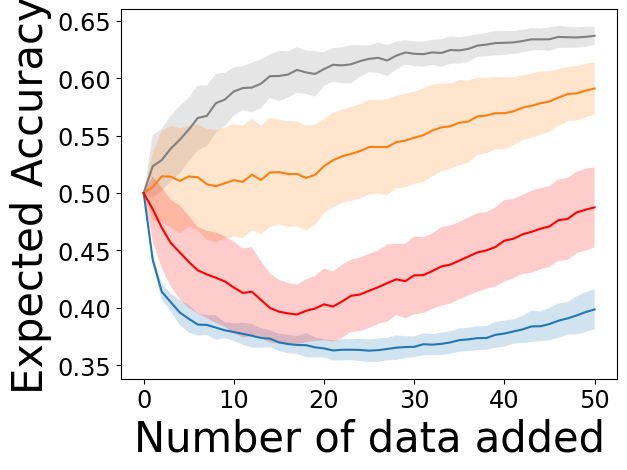

In [128]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots()
x = np.arange(51)

random_line_, = ax.plot(x, random_means_[0:51], color="gray")
random_line_.set_label("Random")
ax.fill_between(x, (random_means_-1/2 * random_stdevs_)[0:51], (random_means_+1/2 * random_stdevs_)[0:51], facecolor="gray", alpha=0.2)

loo_line_, = ax.plot(x, loo_means_[0:51], color="C1")
loo_line_.set_label("LOO")
ax.fill_between(x, (loo_means_-1/2 * loo_stdevs_)[0:51], (loo_means_+1/2 * loo_stdevs_)[0:51], facecolor="C1", alpha=0.2)

shapley_line_, = ax.plot(x, shapley_means_[0:51], color="C0")
shapley_line_.set_label("Shapley")
ax.fill_between(x, (shapley_means_-1/2 * shapley_stdevs_)[0:51], (shapley_means_+1/2 * shapley_stdevs_)[0:51], facecolor="C0", alpha=0.2)

derdava_shapley_line_, = ax.plot(x, derdava_shapley_means_[0:51], color="red")
derdava_shapley_line_.set_label("DeRDaVa")
ax.fill_between(x, (derdava_shapley_means_-1/2 * derdava_shapley_stdevs_)[0:51], (derdava_shapley_means_+1/2 * derdava_shapley_stdevs_)[0:51], facecolor="red", alpha=0.2)

ax.set_xlabel("Number of data added", fontsize=30)
ax.set_ylabel("Expected Accuracy", fontsize=30)
ax.tick_params(axis='both', labelsize='xx-large')

#ax.legend(fontsize='xx-large')

plt.show()
PATH_TO_IMAGES = "./images/point_addition_removal/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "par_add_lowest"), dpi=300, bbox_inches='tight')

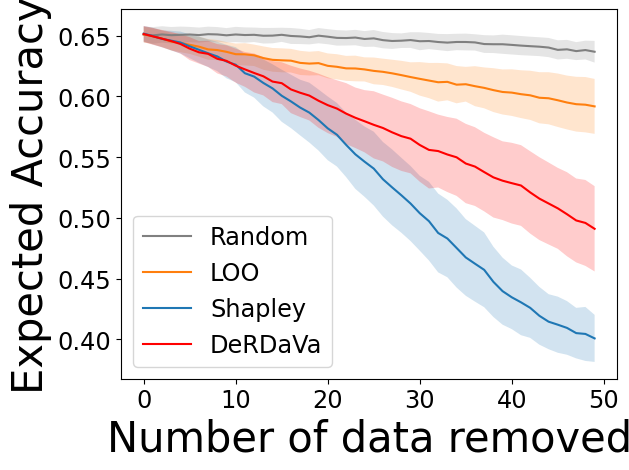

In [130]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots()
x = np.arange(51, 101)

random_line_, = ax.plot(100-x, random_means_[51:101], color="gray")
random_line_.set_label("Random")
ax.fill_between(100-x, (random_means_-1/2 * random_stdevs_)[51:101], (random_means_+1/2 * random_stdevs_)[51:101], facecolor="gray", alpha=0.2)

loo_line_, = ax.plot(100-x, loo_means_[51:101], color="C1")
loo_line_.set_label("LOO")
ax.fill_between(100-x, (loo_means_-1/2 * loo_stdevs_)[51:101], (loo_means_+1/2 * loo_stdevs_)[51:101], facecolor="C1", alpha=0.2)

shapley_line_, = ax.plot(100-x, shapley_means_[51:101], color="C0")
shapley_line_.set_label("Shapley")
ax.fill_between(100-x, (shapley_means_-1/2 * shapley_stdevs_)[51:101], (shapley_means_+1/2 * shapley_stdevs_)[51:101], facecolor="C0", alpha=0.2)

derdava_shapley_line_, = ax.plot(100-x, derdava_shapley_means_[51:101], color="red")
derdava_shapley_line_.set_label("DeRDaVa")
ax.fill_between(100-x, (derdava_shapley_means_-1/2 * derdava_shapley_stdevs_)[51:101], (derdava_shapley_means_+1/2 * derdava_shapley_stdevs_)[51:101], facecolor="red", alpha=0.2)

ax.set_xlabel("Number of data removed", fontsize=30)
ax.set_ylabel("Expected Accuracy", fontsize=30)
ax.tick_params(axis='both', labelsize='xx-large')

ax.legend(fontsize='xx-large')

plt.show()
PATH_TO_IMAGES = "./images/point_addition_removal/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "par_remove_highest"), dpi=300, bbox_inches='tight')